In [1]:
import os
import time

import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Subset

from torchvision import datasets
from torchvision import transforms

import matplotlib.pyplot as plt
from PIL import Image

import math
import copy

from google.colab import drive
drive.mount('/content/drive')

device = torch.device('cuda:0')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
cd drive/'My Drive'

/content/drive/My Drive


In [3]:
from sketch_J.jacobian import *
from sketch_J.utils import *

In [4]:
_,_, train_loader, test_loader = get_data(train_batch_size=1000, test_batch_size=100)

Files already downloaded and verified
Files already downloaded and verified


In [6]:
!pip install pytorchcv
import pytorchcv
from pytorchcv.model_provider import get_model as ptcv_get_model
thismodel = 'resnet20_cifar10'
model = ptcv_get_model(thismodel, pretrained=False)


In [7]:
model = model.to("cuda")

In [8]:
model

CIFARResNet(
  (features): Sequential(
    (init_block): ConvBlock(
      (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (activ): ReLU(inplace=True)
    )
    (stage1): Sequential(
      (unit1): ResUnit(
        (body): ResBlock(
          (conv1): ConvBlock(
            (conv): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (bn): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (activ): ReLU(inplace=True)
          )
          (conv2): ConvBlock(
            (conv): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (bn): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          )
        )
        (activ): ReLU(inplace=True)
      )
      (unit2): ResUnit(
        (body): ResBlock(
          (co

In [9]:
train_acc = compute_acc(model, train_loader, device)        
print(f'train ACC: {train_acc:.2f}, seed: {0}')
        
test_acc = compute_acc(model, test_loader, device)        
print(f'Test ACC: {test_acc:.2f}')

train ACC: 10.00, seed: 0
Test ACC: 10.00


In [10]:
optimizer = torch.optim.SGD(model.parameters(), .01, momentum=0.9, weight_decay=0)
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, [50, 100, 150], gamma=0.1, last_epoch=-1)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Epoch: 001/200 | Batch 000/050 | Cost: 2.4184


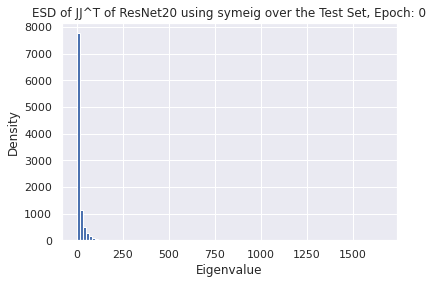

Epoch: 001/200
Train ACC: 27.79
Epoch: 002/200 | Batch 000/050 | Cost: 1.8505
Epoch: 002/200
Train ACC: 36.76
Epoch: 003/200 | Batch 000/050 | Cost: 1.6533
Epoch: 003/200
Train ACC: 38.42
Epoch: 004/200 | Batch 000/050 | Cost: 1.5469
Epoch: 004/200
Train ACC: 42.92
Epoch: 005/200 | Batch 000/050 | Cost: 1.4470
Epoch: 005/200
Train ACC: 47.95
Epoch: 006/200 | Batch 000/050 | Cost: 1.3722
Epoch: 006/200
Train ACC: 50.39
Epoch: 007/200 | Batch 000/050 | Cost: 1.3067
Epoch: 007/200
Train ACC: 52.30
Epoch: 008/200 | Batch 000/050 | Cost: 1.2505
Epoch: 008/200
Train ACC: 53.38
Epoch: 009/200 | Batch 000/050 | Cost: 1.1919
Epoch: 009/200
Train ACC: 55.13
Epoch: 010/200 | Batch 000/050 | Cost: 1.1507
Epoch: 010/200
Train ACC: 56.83
Epoch: 011/200 | Batch 000/050 | Cost: 1.1202


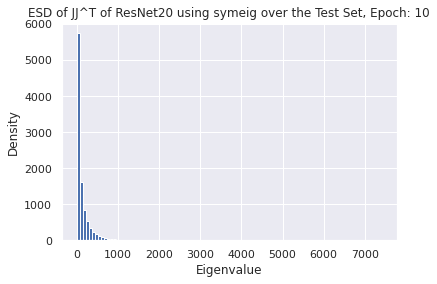

Epoch: 011/200
Train ACC: 57.69
Epoch: 012/200 | Batch 000/050 | Cost: 1.0940
Epoch: 012/200
Train ACC: 59.69
Epoch: 013/200 | Batch 000/050 | Cost: 1.0430
Epoch: 013/200
Train ACC: 59.62
Epoch: 014/200 | Batch 000/050 | Cost: 0.9994
Epoch: 014/200
Train ACC: 63.59
Epoch: 015/200 | Batch 000/050 | Cost: 0.9478
Epoch: 015/200
Train ACC: 59.92
Epoch: 016/200 | Batch 000/050 | Cost: 0.9343
Epoch: 016/200
Train ACC: 60.37
Epoch: 017/200 | Batch 000/050 | Cost: 0.9042
Epoch: 017/200
Train ACC: 59.43
Epoch: 018/200 | Batch 000/050 | Cost: 0.8881
Epoch: 018/200
Train ACC: 63.66
Epoch: 019/200 | Batch 000/050 | Cost: 0.8530
Epoch: 019/200
Train ACC: 65.73
Epoch: 020/200 | Batch 000/050 | Cost: 0.8304
Epoch: 020/200
Train ACC: 66.38
Epoch: 021/200 | Batch 000/050 | Cost: 0.8105


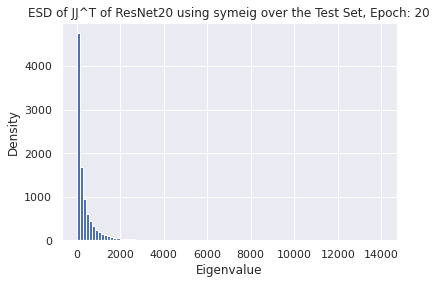

Epoch: 021/200
Train ACC: 67.55
Epoch: 022/200 | Batch 000/050 | Cost: 0.7863
Epoch: 022/200
Train ACC: 67.83
Epoch: 023/200 | Batch 000/050 | Cost: 0.7609
Epoch: 023/200
Train ACC: 65.70
Epoch: 024/200 | Batch 000/050 | Cost: 0.7452
Epoch: 024/200
Train ACC: 62.40
Epoch: 025/200 | Batch 000/050 | Cost: 0.7559
Epoch: 025/200
Train ACC: 64.72
Epoch: 026/200 | Batch 000/050 | Cost: 0.7325
Epoch: 026/200
Train ACC: 64.15
Epoch: 027/200 | Batch 000/050 | Cost: 0.7090
Epoch: 027/200
Train ACC: 64.91
Epoch: 028/200 | Batch 000/050 | Cost: 0.7122
Epoch: 028/200
Train ACC: 66.14
Epoch: 029/200 | Batch 000/050 | Cost: 0.6897
Epoch: 029/200
Train ACC: 70.48
Epoch: 030/200 | Batch 000/050 | Cost: 0.6445
Epoch: 030/200
Train ACC: 72.66
Epoch: 031/200 | Batch 000/050 | Cost: 0.6141


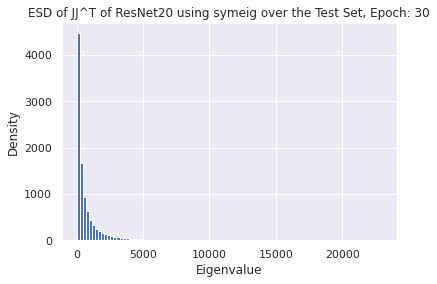

Epoch: 031/200
Train ACC: 72.89
Epoch: 032/200 | Batch 000/050 | Cost: 0.6309
Epoch: 032/200
Train ACC: 73.79
Epoch: 033/200 | Batch 000/050 | Cost: 0.6041
Epoch: 033/200
Train ACC: 72.55
Epoch: 034/200 | Batch 000/050 | Cost: 0.5657
Epoch: 034/200
Train ACC: 71.48
Epoch: 035/200 | Batch 000/050 | Cost: 0.5577
Epoch: 035/200
Train ACC: 73.37
Epoch: 036/200 | Batch 000/050 | Cost: 0.5366
Epoch: 036/200
Train ACC: 72.46
Epoch: 037/200 | Batch 000/050 | Cost: 0.5490
Epoch: 037/200
Train ACC: 71.54
Epoch: 038/200 | Batch 000/050 | Cost: 0.5647
Epoch: 038/200
Train ACC: 69.74
Epoch: 039/200 | Batch 000/050 | Cost: 0.5238
Epoch: 039/200
Train ACC: 71.90
Epoch: 040/200 | Batch 000/050 | Cost: 0.4860
Epoch: 040/200
Train ACC: 72.50
Epoch: 041/200 | Batch 000/050 | Cost: 0.4457


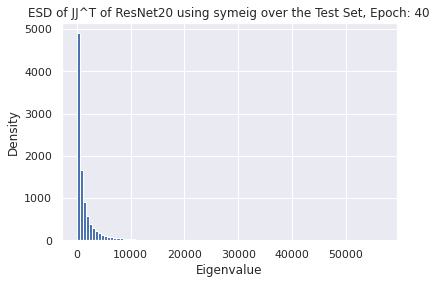

Epoch: 041/200
Train ACC: 74.48
Epoch: 042/200 | Batch 000/050 | Cost: 0.4206
Epoch: 042/200
Train ACC: 72.95
Epoch: 043/200 | Batch 000/050 | Cost: 0.4158
Epoch: 043/200
Train ACC: 70.52
Epoch: 044/200 | Batch 000/050 | Cost: 0.4412
Epoch: 044/200
Train ACC: 76.60
Epoch: 045/200 | Batch 000/050 | Cost: 0.4410
Epoch: 045/200
Train ACC: 75.97
Epoch: 046/200 | Batch 000/050 | Cost: 0.4170
Epoch: 046/200
Train ACC: 71.95
Epoch: 047/200 | Batch 000/050 | Cost: 0.4012
Epoch: 047/200
Train ACC: 77.17
Epoch: 048/200 | Batch 000/050 | Cost: 0.3701
Epoch: 048/200
Train ACC: 79.74
Epoch: 049/200 | Batch 000/050 | Cost: 0.3674
Epoch: 049/200
Train ACC: 77.84
Epoch: 050/200 | Batch 000/050 | Cost: 0.3603
Epoch: 050/200
Train ACC: 74.28
Epoch: 051/200 | Batch 000/050 | Cost: 0.3295


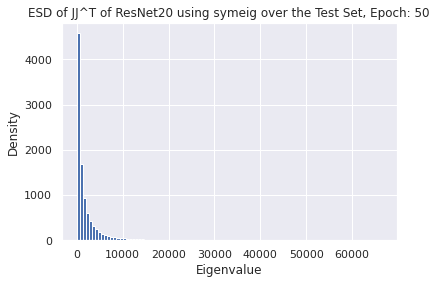

Epoch: 051/200
Train ACC: 91.27
Epoch: 052/200 | Batch 000/050 | Cost: 0.2497
Epoch: 052/200
Train ACC: 92.29
Epoch: 053/200 | Batch 000/050 | Cost: 0.2371
Epoch: 053/200
Train ACC: 92.91
Epoch: 054/200 | Batch 000/050 | Cost: 0.2228
Epoch: 054/200
Train ACC: 93.38
Epoch: 055/200 | Batch 000/050 | Cost: 0.2115
Epoch: 055/200
Train ACC: 93.79
Epoch: 056/200 | Batch 000/050 | Cost: 0.2016
Epoch: 056/200
Train ACC: 94.08
Epoch: 057/200 | Batch 000/050 | Cost: 0.1931
Epoch: 057/200
Train ACC: 94.34
Epoch: 058/200 | Batch 000/050 | Cost: 0.1857
Epoch: 058/200
Train ACC: 94.62
Epoch: 059/200 | Batch 000/050 | Cost: 0.1790
Epoch: 059/200
Train ACC: 94.87
Epoch: 060/200 | Batch 000/050 | Cost: 0.1734
Epoch: 060/200
Train ACC: 95.08
Epoch: 061/200 | Batch 000/050 | Cost: 0.1681


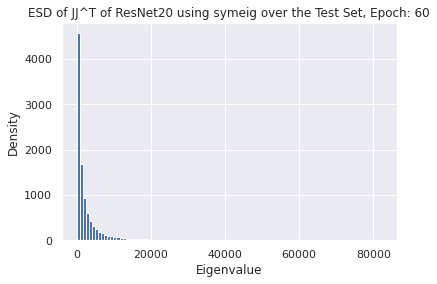

Epoch: 061/200
Train ACC: 95.26
Epoch: 062/200 | Batch 000/050 | Cost: 0.1632
Epoch: 062/200
Train ACC: 95.44
Epoch: 063/200 | Batch 000/050 | Cost: 0.1588
Epoch: 063/200
Train ACC: 95.59
Epoch: 064/200 | Batch 000/050 | Cost: 0.1546
Epoch: 064/200
Train ACC: 95.76
Epoch: 065/200 | Batch 000/050 | Cost: 0.1505
Epoch: 065/200
Train ACC: 95.90
Epoch: 066/200 | Batch 000/050 | Cost: 0.1468
Epoch: 066/200
Train ACC: 96.01
Epoch: 067/200 | Batch 000/050 | Cost: 0.1428
Epoch: 067/200
Train ACC: 96.15
Epoch: 068/200 | Batch 000/050 | Cost: 0.1392
Epoch: 068/200
Train ACC: 96.29
Epoch: 069/200 | Batch 000/050 | Cost: 0.1358
Epoch: 069/200
Train ACC: 96.36
Epoch: 070/200 | Batch 000/050 | Cost: 0.1324
Epoch: 070/200
Train ACC: 96.49
Epoch: 071/200 | Batch 000/050 | Cost: 0.1289


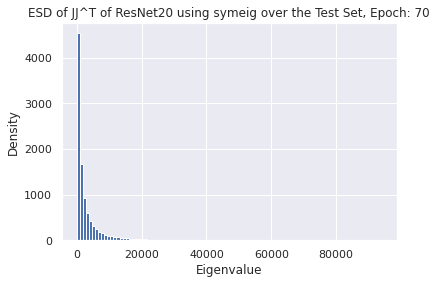

Epoch: 071/200
Train ACC: 96.61
Epoch: 072/200 | Batch 000/050 | Cost: 0.1257
Epoch: 072/200
Train ACC: 96.70
Epoch: 073/200 | Batch 000/050 | Cost: 0.1227
Epoch: 073/200
Train ACC: 96.80
Epoch: 074/200 | Batch 000/050 | Cost: 0.1197
Epoch: 074/200
Train ACC: 96.90
Epoch: 075/200 | Batch 000/050 | Cost: 0.1169
Epoch: 075/200
Train ACC: 96.98
Epoch: 076/200 | Batch 000/050 | Cost: 0.1141
Epoch: 076/200
Train ACC: 97.05
Epoch: 077/200 | Batch 000/050 | Cost: 0.1117
Epoch: 077/200
Train ACC: 97.13
Epoch: 078/200 | Batch 000/050 | Cost: 0.1092
Epoch: 078/200
Train ACC: 97.18
Epoch: 079/200 | Batch 000/050 | Cost: 0.1068
Epoch: 079/200
Train ACC: 97.24
Epoch: 080/200 | Batch 000/050 | Cost: 0.1046
Epoch: 080/200
Train ACC: 97.35
Epoch: 081/200 | Batch 000/050 | Cost: 0.1023


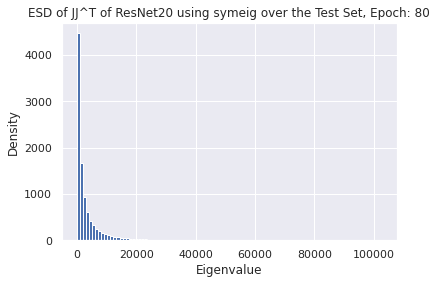

Epoch: 081/200
Train ACC: 97.42
Epoch: 082/200 | Batch 000/050 | Cost: 0.1000
Epoch: 082/200
Train ACC: 97.49
Epoch: 083/200 | Batch 000/050 | Cost: 0.0976
Epoch: 083/200
Train ACC: 97.58
Epoch: 084/200 | Batch 000/050 | Cost: 0.0956
Epoch: 084/200
Train ACC: 97.64
Epoch: 085/200 | Batch 000/050 | Cost: 0.0933
Epoch: 085/200
Train ACC: 97.70
Epoch: 086/200 | Batch 000/050 | Cost: 0.0913
Epoch: 086/200
Train ACC: 97.80
Epoch: 087/200 | Batch 000/050 | Cost: 0.0892
Epoch: 087/200
Train ACC: 97.87
Epoch: 088/200 | Batch 000/050 | Cost: 0.0872
Epoch: 088/200
Train ACC: 97.93
Epoch: 089/200 | Batch 000/050 | Cost: 0.0852
Epoch: 089/200
Train ACC: 98.00
Epoch: 090/200 | Batch 000/050 | Cost: 0.0834
Epoch: 090/200
Train ACC: 98.05
Epoch: 091/200 | Batch 000/050 | Cost: 0.0816


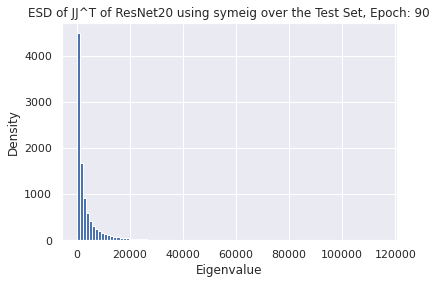

Epoch: 091/200
Train ACC: 98.11
Epoch: 092/200 | Batch 000/050 | Cost: 0.0798
Epoch: 092/200
Train ACC: 98.16
Epoch: 093/200 | Batch 000/050 | Cost: 0.0780
Epoch: 093/200
Train ACC: 98.21
Epoch: 094/200 | Batch 000/050 | Cost: 0.0763
Epoch: 094/200
Train ACC: 98.24
Epoch: 095/200 | Batch 000/050 | Cost: 0.0746
Epoch: 095/200
Train ACC: 98.30
Epoch: 096/200 | Batch 000/050 | Cost: 0.0728
Epoch: 096/200
Train ACC: 98.32
Epoch: 097/200 | Batch 000/050 | Cost: 0.0713
Epoch: 097/200
Train ACC: 98.37
Epoch: 098/200 | Batch 000/050 | Cost: 0.0697
Epoch: 098/200
Train ACC: 98.42
Epoch: 099/200 | Batch 000/050 | Cost: 0.0680
Epoch: 099/200
Train ACC: 98.48
Epoch: 100/200 | Batch 000/050 | Cost: 0.0664
Epoch: 100/200
Train ACC: 98.52
Epoch: 101/200 | Batch 000/050 | Cost: 0.0649


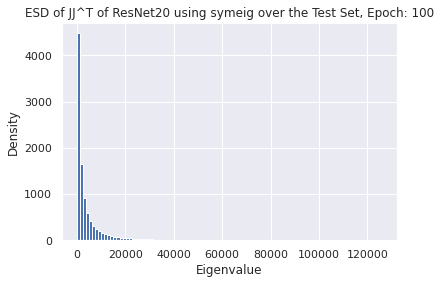

Epoch: 101/200
Train ACC: 99.04
Epoch: 102/200 | Batch 000/050 | Cost: 0.0640
Epoch: 102/200
Train ACC: 99.09
Epoch: 103/200 | Batch 000/050 | Cost: 0.0643
Epoch: 103/200
Train ACC: 99.09
Epoch: 104/200 | Batch 000/050 | Cost: 0.0640
Epoch: 104/200
Train ACC: 99.10
Epoch: 105/200 | Batch 000/050 | Cost: 0.0637
Epoch: 105/200
Train ACC: 99.11
Epoch: 106/200 | Batch 000/050 | Cost: 0.0634
Epoch: 106/200
Train ACC: 99.12
Epoch: 107/200 | Batch 000/050 | Cost: 0.0631
Epoch: 107/200
Train ACC: 99.13
Epoch: 108/200 | Batch 000/050 | Cost: 0.0628
Epoch: 108/200
Train ACC: 99.14
Epoch: 109/200 | Batch 000/050 | Cost: 0.0626
Epoch: 109/200
Train ACC: 99.15
Epoch: 110/200 | Batch 000/050 | Cost: 0.0623
Epoch: 110/200
Train ACC: 99.15
Epoch: 111/200 | Batch 000/050 | Cost: 0.0621


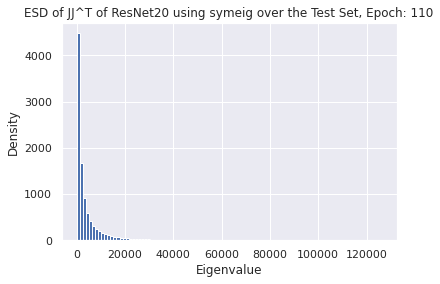

Epoch: 111/200
Train ACC: 99.15
Epoch: 112/200 | Batch 000/050 | Cost: 0.0619
Epoch: 112/200
Train ACC: 99.16
Epoch: 113/200 | Batch 000/050 | Cost: 0.0617
Epoch: 113/200
Train ACC: 99.16
Epoch: 114/200 | Batch 000/050 | Cost: 0.0614
Epoch: 114/200
Train ACC: 99.17
Epoch: 115/200 | Batch 000/050 | Cost: 0.0612
Epoch: 115/200
Train ACC: 99.17
Epoch: 116/200 | Batch 000/050 | Cost: 0.0610
Epoch: 116/200
Train ACC: 99.18
Epoch: 117/200 | Batch 000/050 | Cost: 0.0608
Epoch: 117/200
Train ACC: 99.18
Epoch: 118/200 | Batch 000/050 | Cost: 0.0607
Epoch: 118/200
Train ACC: 99.19
Epoch: 119/200 | Batch 000/050 | Cost: 0.0605
Epoch: 119/200
Train ACC: 99.20
Epoch: 120/200 | Batch 000/050 | Cost: 0.0603
Epoch: 120/200
Train ACC: 99.20
Epoch: 121/200 | Batch 000/050 | Cost: 0.0601


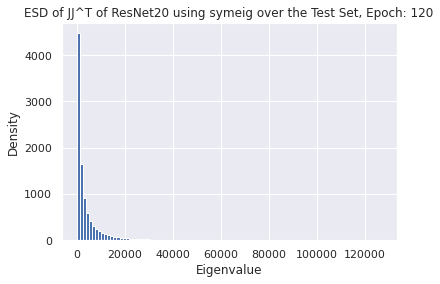

Epoch: 121/200
Train ACC: 99.21
Epoch: 122/200 | Batch 000/050 | Cost: 0.0599
Epoch: 122/200
Train ACC: 99.22
Epoch: 123/200 | Batch 000/050 | Cost: 0.0597
Epoch: 123/200
Train ACC: 99.23
Epoch: 124/200 | Batch 000/050 | Cost: 0.0595
Epoch: 124/200
Train ACC: 99.23
Epoch: 125/200 | Batch 000/050 | Cost: 0.0594
Epoch: 125/200
Train ACC: 99.24
Epoch: 126/200 | Batch 000/050 | Cost: 0.0592
Epoch: 126/200
Train ACC: 99.24
Epoch: 127/200 | Batch 000/050 | Cost: 0.0590
Epoch: 127/200
Train ACC: 99.24
Epoch: 128/200 | Batch 000/050 | Cost: 0.0589
Epoch: 128/200
Train ACC: 99.24
Epoch: 129/200 | Batch 000/050 | Cost: 0.0587
Epoch: 129/200
Train ACC: 99.24
Epoch: 130/200 | Batch 000/050 | Cost: 0.0585
Epoch: 130/200
Train ACC: 99.26
Epoch: 131/200 | Batch 000/050 | Cost: 0.0584


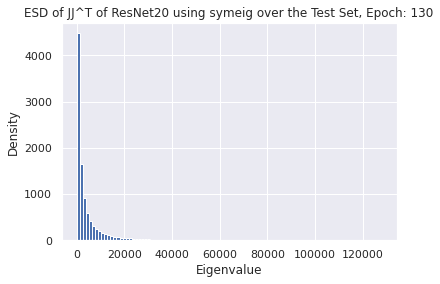

Epoch: 131/200
Train ACC: 99.26
Epoch: 132/200 | Batch 000/050 | Cost: 0.0582
Epoch: 132/200
Train ACC: 99.26
Epoch: 133/200 | Batch 000/050 | Cost: 0.0580
Epoch: 133/200
Train ACC: 99.26
Epoch: 134/200 | Batch 000/050 | Cost: 0.0579
Epoch: 134/200
Train ACC: 99.27
Epoch: 135/200 | Batch 000/050 | Cost: 0.0577
Epoch: 135/200
Train ACC: 99.27
Epoch: 136/200 | Batch 000/050 | Cost: 0.0576
Epoch: 136/200
Train ACC: 99.27
Epoch: 137/200 | Batch 000/050 | Cost: 0.0574
Epoch: 137/200
Train ACC: 99.27
Epoch: 138/200 | Batch 000/050 | Cost: 0.0573
Epoch: 138/200
Train ACC: 99.28
Epoch: 139/200 | Batch 000/050 | Cost: 0.0571
Epoch: 139/200
Train ACC: 99.28
Epoch: 140/200 | Batch 000/050 | Cost: 0.0569
Epoch: 140/200
Train ACC: 99.29
Epoch: 141/200 | Batch 000/050 | Cost: 0.0568


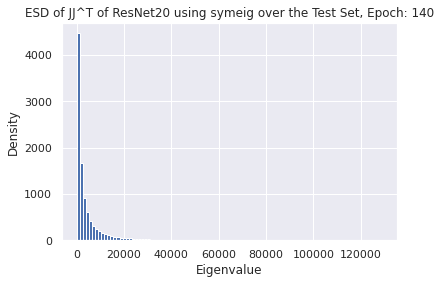

Epoch: 141/200
Train ACC: 99.29
Epoch: 142/200 | Batch 000/050 | Cost: 0.0566
Epoch: 142/200
Train ACC: 99.30
Epoch: 143/200 | Batch 000/050 | Cost: 0.0565
Epoch: 143/200
Train ACC: 99.30
Epoch: 144/200 | Batch 000/050 | Cost: 0.0563
Epoch: 144/200
Train ACC: 99.31
Epoch: 145/200 | Batch 000/050 | Cost: 0.0562
Epoch: 145/200
Train ACC: 99.31
Epoch: 146/200 | Batch 000/050 | Cost: 0.0561
Epoch: 146/200
Train ACC: 99.32
Epoch: 147/200 | Batch 000/050 | Cost: 0.0559
Epoch: 147/200
Train ACC: 99.32
Epoch: 148/200 | Batch 000/050 | Cost: 0.0558
Epoch: 148/200
Train ACC: 99.32
Epoch: 149/200 | Batch 000/050 | Cost: 0.0556
Epoch: 149/200
Train ACC: 99.32
Epoch: 150/200 | Batch 000/050 | Cost: 0.0555
Epoch: 150/200
Train ACC: 99.32
Epoch: 151/200 | Batch 000/050 | Cost: 0.0554


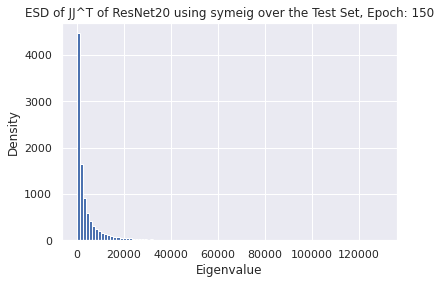

Epoch: 151/200
Train ACC: 99.34
Epoch: 152/200 | Batch 000/050 | Cost: 0.0553
Epoch: 152/200
Train ACC: 99.34
Epoch: 153/200 | Batch 000/050 | Cost: 0.0553
Epoch: 153/200
Train ACC: 99.34
Epoch: 154/200 | Batch 000/050 | Cost: 0.0552
Epoch: 154/200
Train ACC: 99.34
Epoch: 155/200 | Batch 000/050 | Cost: 0.0552
Epoch: 155/200
Train ACC: 99.34
Epoch: 156/200 | Batch 000/050 | Cost: 0.0552
Epoch: 156/200
Train ACC: 99.33
Epoch: 157/200 | Batch 000/050 | Cost: 0.0551
Epoch: 157/200
Train ACC: 99.33
Epoch: 158/200 | Batch 000/050 | Cost: 0.0551
Epoch: 158/200
Train ACC: 99.33
Epoch: 159/200 | Batch 000/050 | Cost: 0.0551
Epoch: 159/200
Train ACC: 99.33
Epoch: 160/200 | Batch 000/050 | Cost: 0.0551
Epoch: 160/200
Train ACC: 99.34
Epoch: 161/200 | Batch 000/050 | Cost: 0.0551


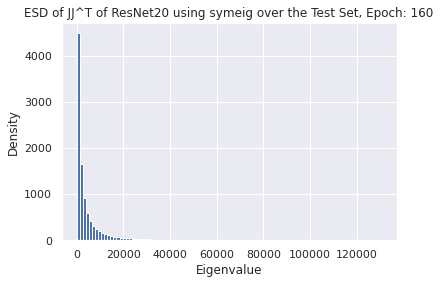

Epoch: 161/200
Train ACC: 99.34
Epoch: 162/200 | Batch 000/050 | Cost: 0.0550
Epoch: 162/200
Train ACC: 99.34
Epoch: 163/200 | Batch 000/050 | Cost: 0.0550
Epoch: 163/200
Train ACC: 99.34
Epoch: 164/200 | Batch 000/050 | Cost: 0.0550
Epoch: 164/200
Train ACC: 99.34
Epoch: 165/200 | Batch 000/050 | Cost: 0.0550
Epoch: 165/200
Train ACC: 99.34
Epoch: 166/200 | Batch 000/050 | Cost: 0.0550
Epoch: 166/200
Train ACC: 99.35
Epoch: 167/200 | Batch 000/050 | Cost: 0.0549
Epoch: 167/200
Train ACC: 99.35
Epoch: 168/200 | Batch 000/050 | Cost: 0.0549
Epoch: 168/200
Train ACC: 99.35
Epoch: 169/200 | Batch 000/050 | Cost: 0.0549
Epoch: 169/200
Train ACC: 99.35
Epoch: 170/200 | Batch 000/050 | Cost: 0.0549
Epoch: 170/200
Train ACC: 99.35
Epoch: 171/200 | Batch 000/050 | Cost: 0.0549


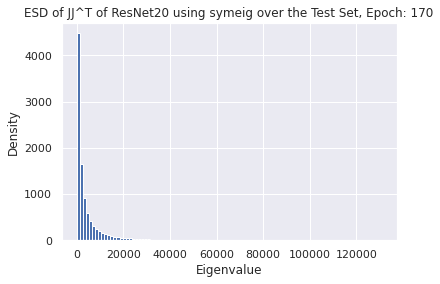

Epoch: 171/200
Train ACC: 99.35
Epoch: 172/200 | Batch 000/050 | Cost: 0.0549
Epoch: 172/200
Train ACC: 99.35
Epoch: 173/200 | Batch 000/050 | Cost: 0.0549
Epoch: 173/200
Train ACC: 99.35
Epoch: 174/200 | Batch 000/050 | Cost: 0.0548
Epoch: 174/200
Train ACC: 99.35
Epoch: 175/200 | Batch 000/050 | Cost: 0.0548
Epoch: 175/200
Train ACC: 99.35
Epoch: 176/200 | Batch 000/050 | Cost: 0.0548
Epoch: 176/200
Train ACC: 99.35
Epoch: 177/200 | Batch 000/050 | Cost: 0.0548
Epoch: 177/200
Train ACC: 99.35
Epoch: 178/200 | Batch 000/050 | Cost: 0.0548
Epoch: 178/200
Train ACC: 99.35
Epoch: 179/200 | Batch 000/050 | Cost: 0.0548
Epoch: 179/200
Train ACC: 99.35
Epoch: 180/200 | Batch 000/050 | Cost: 0.0547
Epoch: 180/200
Train ACC: 99.35
Epoch: 181/200 | Batch 000/050 | Cost: 0.0547


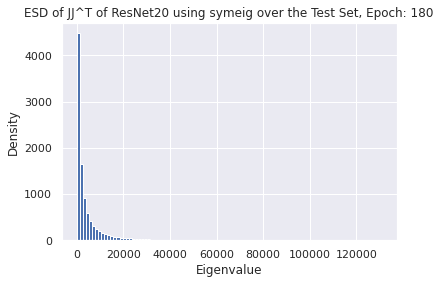

Epoch: 181/200
Train ACC: 99.35
Epoch: 182/200 | Batch 000/050 | Cost: 0.0547
Epoch: 182/200
Train ACC: 99.35
Epoch: 183/200 | Batch 000/050 | Cost: 0.0547
Epoch: 183/200
Train ACC: 99.35
Epoch: 184/200 | Batch 000/050 | Cost: 0.0547
Epoch: 184/200
Train ACC: 99.35
Epoch: 185/200 | Batch 000/050 | Cost: 0.0547
Epoch: 185/200
Train ACC: 99.35
Epoch: 186/200 | Batch 000/050 | Cost: 0.0547
Epoch: 186/200
Train ACC: 99.36
Epoch: 187/200 | Batch 000/050 | Cost: 0.0546
Epoch: 187/200
Train ACC: 99.36
Epoch: 188/200 | Batch 000/050 | Cost: 0.0546
Epoch: 188/200
Train ACC: 99.36
Epoch: 189/200 | Batch 000/050 | Cost: 0.0546
Epoch: 189/200
Train ACC: 99.36
Epoch: 190/200 | Batch 000/050 | Cost: 0.0546
Epoch: 190/200
Train ACC: 99.36
Epoch: 191/200 | Batch 000/050 | Cost: 0.0546


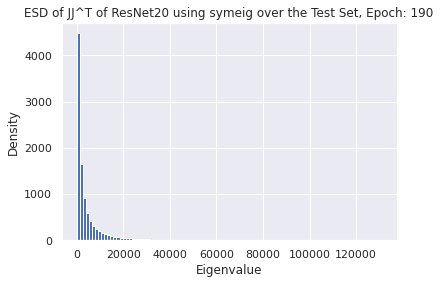

Epoch: 191/200
Train ACC: 99.36
Epoch: 192/200 | Batch 000/050 | Cost: 0.0546
Epoch: 192/200
Train ACC: 99.36
Epoch: 193/200 | Batch 000/050 | Cost: 0.0546
Epoch: 193/200
Train ACC: 99.36
Epoch: 194/200 | Batch 000/050 | Cost: 0.0546
Epoch: 194/200
Train ACC: 99.36
Epoch: 195/200 | Batch 000/050 | Cost: 0.0545
Epoch: 195/200
Train ACC: 99.36
Epoch: 196/200 | Batch 000/050 | Cost: 0.0545
Epoch: 196/200
Train ACC: 99.36
Epoch: 197/200 | Batch 000/050 | Cost: 0.0545
Epoch: 197/200
Train ACC: 99.36
Epoch: 198/200 | Batch 000/050 | Cost: 0.0545
Epoch: 198/200
Train ACC: 99.36
Epoch: 199/200 | Batch 000/050 | Cost: 0.0545
Epoch: 199/200
Train ACC: 99.36
Epoch: 200/200 | Batch 000/050 | Cost: 0.0545
Epoch: 200/200
Train ACC: 99.36


In [11]:
import seaborn as sns
sns.set()

criterion = nn.CrossEntropyLoss()

cost_list = []
train_acc_list = []


epoch_max = 200

for epoch in range(epoch_max):
    model.train()
    for batch_idx, (features, targets) in enumerate(train_loader):
    # compute output
      features, targets = features.to("cuda:0"), targets.to("cuda:0")

      output = model(features)
      loss = criterion(output, targets)

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      cost_list.append(loss.item())
      if not batch_idx % 150:
        print (f'Epoch: {epoch+1:03d}/{epoch_max:03d} | '
                   f'Batch {batch_idx:03d}/{len(train_loader):03d} |' 
                   f' Cost: {loss:.4f}')
    if epoch % 10 == 0:
      model.eval()
      full_J = construct_diagJ(model, test_loader, batch_size=100, device='cuda:0') # The P100 on Colab should have enough memory to do this
      M = full_J @ full_J.t() 
      del full_J
      u, v = torch.symeig(M)
      del M
      plt.hist(u.cpu().numpy(), bins=100)
      plt.title("ESD of JJ^T of ResNet20 using symeig over the Test Set, Epoch: " + str(epoch)) 
      plt.xlabel("Eigenvalue")
      plt.ylabel("Density")
      plt.show()

    model.eval()
    with torch.set_grad_enabled(False): # save memory during inference
        
        train_acc = compute_acc(model, train_loader, device)        
        print(f'Epoch: {epoch+1:03d}/{epoch_max:03d}\n'
              f'Train ACC: {train_acc:.2f}')
        
        train_acc_list.append(train_acc)
        #if np.isclose(train_acc, 0.0):
          #torch.save(model.state_dict(), 'MLP_truelabels_randomseed1')
          #pass
    scheduler.step()

#np.save('cost_MLP_truelabels_randomseed1', cost_list)
#np.save('trainacc_MLP_truelabels_randomseed1', train_acc_list)

 

In [12]:
test_acc = compute_acc(model, test_loader,device)        
print(f'Test ACC: {test_acc:.2f}')

Test ACC: 66.40
